<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Deep Learning and Reinforcement Learning - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the deep learning models you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?  
3. Does the report include a section with variations of a Deep Learning model and specifies which one is the model that best suits the main objective(s) of this analysis?
4. Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 



## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
!pip install matplotlib
!pip install openpyxl
!pip install scikit-learn
!pip install seaborn
!pip install numpy==1.21.4
!pip install pandas==1.3.4
!pip install keras==2.1.6
#!pip install git+https://github.com/chasingbob/keras-explained.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 60.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 73.0 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.1 MB/s eta 0:00:0000:0100:01


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [5]:
#data = pd.read_csv('')
#data.head()

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.
*   Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
*   Brief summary of data exploration and actions taken for data cleaning or feature engineering.
*   Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.
*   A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.
*   Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.


# 1. About the Data


As one dataset provided by United Nation's, the 'undesa_pd_2020' datasets includes the patterns of total population and the migrant flows collected every 5 years, from 1990 to 2020, from which some further information of population aging and immigrant stock can be disclosed.

For this lab, we will be using the <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> file, hosted on development sectors of UN. Let's download the file [here](https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx') and upload to workspace first.

Among the dataset, the sheet Table 2 contains total population at mid-year by age and sex and by region, country or area of destination, 1990-2020 (thousands). The sheet Table 1 contains international migrant stock at mid-year by age and sex and by region, country or area of destination, 1990-2020. Let's read this data into pandas data frame of data1. Due to the similar structure of the 2 sheets, they can be wrangled in similar ways.

In [6]:
start_row = 10
data1 = pd.read_excel('undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx', sheet_name='Table 1', header=start_row)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Index                                       1981 non-null   int64 
 1   Year                                        1981 non-null   int64 
 2   Region, development group, country or area  1981 non-null   object
 3   Notes                                       287 non-null    object
 4   Location code                               1981 non-null   int64 
 5   Type of data                                1624 non-null   object
 6   0-4                                         1981 non-null   object
 7   5-9                                         1981 non-null   object
 8   10-14                                       1981 non-null   object
 9    15-19                                      1981 non-null   object
 10  20-24                   

In [7]:
data2 = pd.read_excel('undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx', sheet_name='Table 2', header=start_row)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index                                       1981 non-null   int64  
 1   Year                                        1981 non-null   int64  
 2   Region, development group, country or area  1981 non-null   object 
 3   Notes                                       287 non-null    object 
 4   Location code                               1981 non-null   int64  
 5   Type of data                                1624 non-null   object 
 6   0-4                                         1981 non-null   object 
 7   5-9                                         1981 non-null   object 
 8   10-14                                       1981 non-null   object 
 9    15-19                                      1981 non-null   object 
 10  20-24       

Let's check field names, drop irrelative columns and rows. Note that the series field names like '0-4, 5-9, ..., Total' repeat for 3 times. We will focus only on ages and make it less confusing which is the first copy. Besides, transfer the series values of '0-4, 5-9, ..., Total' to numerical varibles.

In [8]:
cols_to_drop = data1.columns.tolist()[23:]  # same to data2
data1 = data1.drop(cols_to_drop, axis=1)
data2 = data2.drop(cols_to_drop, axis=1)
for col in data1.columns.tolist():
    data1.rename(columns={col:col.strip()}, inplace=True)
for col in data2.columns.tolist():
    data2.rename(columns={col:col.strip()}, inplace=True)
for col in data1.columns.tolist()[6:]:  # same to data2
    data1 = data1.drop(data1[data1[col]=='..'].index)
    data1[col] = data1[col].astype('float')
    data2 = data2.drop(data2[data2[col]=='..'].index)
    data2[col] = data2[col].astype('float')

The column `Region, development group, country or area` is shared by both tables, which is a categorical variable. Let's take a glance at their values.

In [9]:
data1['Region, development group, country or area'].value_counts()

  Australia and New Zealand      14
WORLD                             7
   Spain*                         7
   Liechtenstein                  7
   Germany                        7
                                 ..
   Wallis and Futuna Islands*     7
   Sint Maarten (Dutch part)*     4
   Montenegro                     3
   Curaçao*                       3
   South Sudan                    3
Name: Region, development group, country or area, Length: 276, dtype: int64

In [10]:
data2['Region, development group, country or area'].value_counts()

  Australia and New Zealand    14
WORLD                           7
   Malta                        7
   Iceland                      7
   Ireland                      7
                               ..
   Tajikistan                   7
   Turkmenistan                 7
   Uzbekistan                   7
  Eastern Asia                  7
   Tonga                        7
Name: Region, development group, country or area, Length: 248, dtype: int64

There are ttems among values in at least 3 levels, region, development group and country or area. In empirical knowledge, the policy making for population aging and immigrant stock is country-wise. So we only focus on rows representing country or area of these two tables by consulting another field of `Type of data`, whose value can mask the country-or-area rows.
We just focus on the common values of field of `Region, development group, country or area` between the two table and make the 'inner join'. First, strip 'Region, development group, country or area' field to avoid any controversial reference. **Don't forget to refer another field of 'year' in common fields as well**

In [11]:
data1_CR = data1.dropna(subset=['Type of data'])
data2_CR = data2.dropna(subset=['Type of data'])
data1_CR['Region, development group, country or area'] = data1_CR['Region, development group, country or area'].str.strip()
data2_CR['Region, development group, country or area'] = data2_CR['Region, development group, country or area'].str.strip()

In [12]:
data_CR = pd.merge(data2_CR, data1_CR, on=['Region, development group, country or area', 'Year'], how='inner')
data_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index_x                                     1388 non-null   int64  
 1   Year                                        1388 non-null   int64  
 2   Region, development group, country or area  1388 non-null   object 
 3   Notes_x                                     136 non-null    object 
 4   Location code_x                             1388 non-null   int64  
 5   Type of data_x                              1388 non-null   object 
 6   0-4_x                                       1388 non-null   float64
 7   5-9_x                                       1388 non-null   float64
 8   10-14_x                                     1388 non-null   float64
 9   15-19_x                                     1388 non-null   float64
 10  20-24_x     

The output field names ending with '_x' is the first augment of `merge` function, namely data2CR of sheet 'Table 2' for total population. We need to rename the endings into 'totalpop'. Similarly, for '_y' into '_migrants'.

In [13]:
for col in data_CR.columns.tolist():
    if col[-2:]=='_x':
        data_CR.rename(columns={col:col[:-2]+'_totalpop'}, inplace=True)
    elif col[-2:]=='_y':
        data_CR.rename(columns={col:col[:-2]+'_migrants'}, inplace=True)
data_CR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Index_totalpop                              1388 non-null   int64  
 1   Year                                        1388 non-null   int64  
 2   Region, development group, country or area  1388 non-null   object 
 3   Notes_totalpop                              136 non-null    object 
 4   Location code_totalpop                      1388 non-null   int64  
 5   Type of data_totalpop                       1388 non-null   object 
 6   0-4_totalpop                                1388 non-null   float64
 7   5-9_totalpop                                1388 non-null   float64
 8   10-14_totalpop                              1388 non-null   float64
 9   15-19_totalpop                              1388 non-null   float64
 10  20-24_totalp

According to the International Monetary Fund, 41 countries and territories are officially listed as "advanced economies", with the addition of 7 microstates and dependencies modified by the CIA which were omitted from the IMF version (looking up [wikipedia]('https://www.baidu.com/link?url=ZA31WMbzoM-ZcRHRuYAvHEv0SCOW_e7N-J22OlPeno-gFc3Hh0u-sOkm4g3IJWJO&wd=&eqid=dcceaad2000536f300000004672ac5ea') for 'developed country'). Putting it to a list, we add another field **Reg_type** to our table to be filled on the mapping of 'Region, development group, country or area'. **We invite a cleaning processing to the list to see the potential bugs during mapping**.

In [14]:
developed_regs = ['Andorra', 'Australia', 'Austria', 
                  'Belgium', 'Bermuda', 
                  'Canada', 'Croatia', 'Cyprus', 'Czechia', 
                  'Denmark', 
                  'Estonia', 
                  'Faroe Islands', 
                  'Guernsey', 
                  'Finland', 'France', 
                  'Germany', 'Greece', 
                  'Holy See', 'Hong Kong',
                  'Iceland', 'Ireland', 'Israel', 'Italy', 
                  'Japan', 'Jersey', 
                  'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
                  'Macao', 'Malta', 'Monaco', 
                  'Netherlands', 'New Zealand', 
                  'Norway', 
                  'Portugal', 'Puerto Rico', 
                  'Republic of Korea', 
                  'SanMarino', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
                  'Taiwan', 
                  'United Kingdom', 'United States of America']
data_CR['Reg_type'] = 'developing'

developed_regs_ = []
def process_row(row):
    sw = 0
    for reg in developed_regs:
        if reg in row['Region, development group, country or area']:
            sw = 1
            if reg not in developed_regs_:
                developed_regs_.append(reg)
    if sw == 1:
        row['Reg_type'] = 'developed'
    return row
data_CR = data_CR.apply(process_row, axis=1)
print('Not include currently: ' + str(set(developed_regs)-set(developed_regs_)))
data_CR['Reg_type'].value_counts()

Not include currently: {'Liechtenstein', 'SanMarino', 'Bermuda', 'Guernsey', 'Monaco', 'Jersey', 'Faroe Islands', 'Holy See', 'Andorra', 'Taiwan'}


developing    1115
developed      273
Name: Reg_type, dtype: int64

# 2. Objectives


Population aging and labour force migrant are both keen concerns of today's world, particularly for countries whose development largely depends on demographic dividend. **We want to determine if there is a relationship between the age patterns and development status of the region**. In addition, for given data, one way to derive information out from scale indicators is to deploy **idea of Proportion**.

As such concerns, we then introduce the 4 potential indicators of popluation patterns in age, the first being Working Population (low-aged) Rate (**WPR**, proportion of age 15 to 34) of migrant stock, the second being **WPR** of total population, the third being Ageing Population Rate (**APR**, proportion of age not less than 65) of migrant stock, the last being **APR** of total popluation. We also introduce a field **Total_migrants_%** to present the proportion of migrant stock to total population. The **Reg_type** is also needed for the interpretation purpose.

We carry out the feature engineering in newly-created fields of table rather than put it into a function, respectively for total population and migrants stock.

In [15]:
data_CR['WPR_migrants'] = (data_CR['15-19_migrants'] + 
                           data_CR['20-24_migrants'] + 
                           data_CR['25-29_migrants'] + 
                           data_CR['30-34_migrants'])/data_CR['Total_migrants']
data_CR['WPR_totalpop'] = (data_CR['15-19_totalpop'] + 
                           data_CR['20-24_totalpop'] + 
                           data_CR['25-29_totalpop'] + 
                           data_CR['30-34_totalpop'])/data_CR['Total_totalpop']
data_CR['APR_migrants'] = (data_CR['65-69_migrants'] + 
                           data_CR['70-74_migrants'] + 
                           data_CR['75+_migrants']  )/data_CR['Total_migrants']
data_CR['APR_totalpop'] = (data_CR['65-69_totalpop'] + 
                           data_CR['70-74_totalpop'] + 
                           data_CR['75+_totalpop']  )/data_CR['Total_totalpop']
data_CR['Total_migrants_%'] = data_CR['Total_migrants']/data_CR['Total_totalpop']
data_CR.head()

,Index_totalpop,Year,"Region, development group, country or area",Notes_totalpop,Location code_totalpop,Type of data_totalpop,0-4_totalpop,5-9_totalpop,10-14_totalpop,15-19_totalpop,...,65-69_migrants,70-74_migrants,75+_migrants,Total_migrants,Reg_type,WPR_migrants,WPR_totalpop,APR_migrants,APR_totalpop,Total_migrants_%
0,162,1990,Burundi,NaN,108,B R,1096.536,851.909,657.512,511.834,...,7646.0,3058.0,4598.0,333110.0,developing,0.391069,0.320897,0.045937,0.027557,61.245176
1,163,1995,Burundi,NaN,108,B R,1167.688,1018.813,825.584,621.778,...,5850.0,2340.0,3516.0,254853.0,developing,0.391069,0.299189,0.045932,0.025410,42.567417
2,164,2000,Burundi,NaN,108,B R,1155.817,1071.660,966.550,756.273,...,2637.0,2435.0,1465.0,125628.0,developing,0.404655,0.307389,0.052035,0.024983,19.694394
3,165,2005,Burundi,NaN,108,B R,1306.825,1101.745,1051.291,946.632,...,3404.0,2932.0,2060.0,192774.0,developing,0.339117,0.342836,0.043554,0.022762,26.174846
4,166,2010,Burundi,NaN,108,B R,1578.653,1257.540,1080.003,1036.505,...,4629.0,3422.0,3939.0,247321.0,developing,0.338697,0.365783,0.048480,0.021609,28.507634


In the Deep Learning that follows, we want pay special attention to the variables of **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop**, **Total_migrants_%** and **Reg_type**, to explore the factors that raise some conclusions about the hypothesis their relationship. Lets's put them in a new table:

In [16]:
data_CRS = data_CR[['APR_migrants', 'APR_totalpop', 'WPR_migrants', 'WPR_totalpop', 'Total_migrants_%', 'Reg_type']]
data_CRS.head()

,APR_migrants,APR_totalpop,WPR_migrants,WPR_totalpop,Total_migrants_%,Reg_type
0,0.045937,0.027557,0.391069,0.320897,61.245176,developing
1,0.045932,0.025410,0.391069,0.299189,42.567417,developing
2,0.052035,0.024983,0.404655,0.307389,19.694394,developing
3,0.043554,0.022762,0.339117,0.342836,26.174846,developing
4,0.048480,0.021609,0.338697,0.365783,28.507634,developing


Let's take a brief look at the data by plotting the distribution of **Total_migrants_%** divided by **Reg_type** for the two groups using seaborn's <code>boxplot()</code> function. As we can see, despite the upper outliers, the proportion of migrants to total population in developing countries is less than the developed.

[Text(0.5, 1.0, 'Total_migrants_% of both Reg_type')]

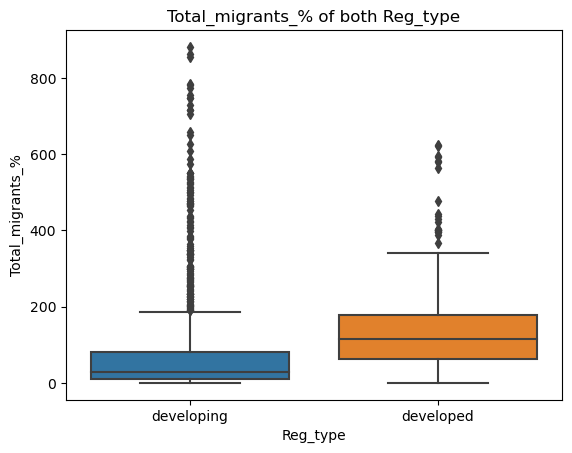

In [17]:
sns.boxplot(x=data_CRS['Reg_type'], y=data_CRS['Total_migrants_%'], data=data_CRS).set(title='Total_migrants_% of both Reg_type')

Let's take a brief look at the data by plotting the distribution of **APR_totalpop** divided by **Reg_type** for the two groups using seaborn's <code>boxplot()</code> function. It also depicts the significant difference.

[Text(0.5, 1.0, 'APR_totalpop of both Reg_type')]

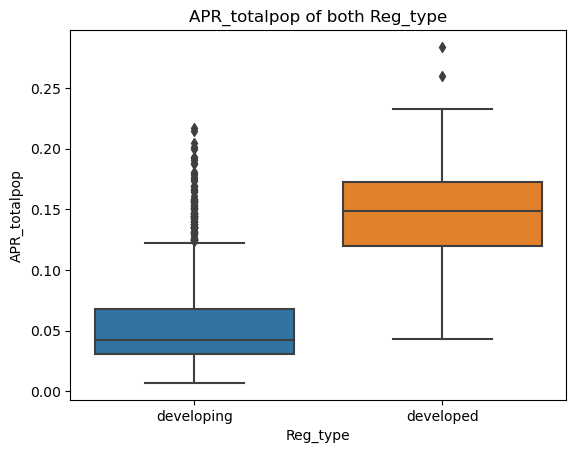

In [18]:
sns.boxplot(x=data_CRS['Reg_type'], y=data_CRS['APR_totalpop'], data=data_CRS).set(title='APR_totalpop of both Reg_type')

Let's take a brief look at the data by plotting the distribution of **WPR_totalpop** divided by **Reg_type** for the two groups using seaborn's <code>boxplot()</code> function. It also depicts the significant difference. 

[Text(0.5, 1.0, 'WPR_totalpop of both Reg_type')]

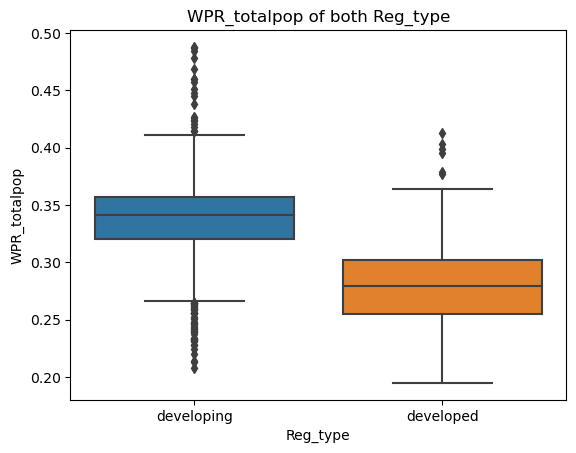

In [19]:
sns.boxplot(x=data_CRS['Reg_type'], y=data_CRS['WPR_totalpop'], data=data_CRS).set(title='WPR_totalpop of both Reg_type')

# 3. Deep Learning Models


Here, we will build a regression model using the deep learning Keras library, and then we will experiment the same architecture of  deep neural networks with regulation and optimization by increasing the number of neurons and adding on dropout layers. We will make the model fitting on original data and that reduced in dimensions, respectively. We will see how changing these parameters impacts the performance of the model.

The independent vaiables is all newly added proportions of certain group, 6 in all. That is:

* WPR_migrants                                1388 non-null   float64
* WPR_totalpop                                1388 non-null   float64
* APR_migrants                                1388 non-null   float64
* APR_totalpop                                1388 non-null   float64
* Total_migrants_%                            1388 non-null   float64
* Reg_type                                    1388 non-null   object 

The last is a categorial variable with just two unique values. Let's use `LabelEncoder` to fit_transform the 'Reg_type' column first. The first 5 variables are numerical variables, so standard scaling is necessary:

In [20]:
cols4X = ['APR_migrants', 'APR_totalpop', 'WPR_migrants', 'WPR_totalpop', 'Total_migrants_%']
data_CRS_ = data_CRS.copy()
le = LabelEncoder()
data_CRS_['Reg_type'] = le.fit_transform(data_CRS_.Reg_type)
sc = StandardScaler()
data_CRS_[cols4X] = sc.fit_transform(data_CRS[cols4X])
data_CRS_.describe()

,APR_migrants,APR_totalpop,WPR_migrants,WPR_totalpop,Total_migrants_%,Reg_type
count,1.388000e+03,1.388000e+03,1.388000e+03,1.388000e+03,1.388000e+03,1388.000000
mean,8.214691e-17,-4.555274e-17,1.863703e-16,-3.293075e-16,6.251004e-17,0.803314
std,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,0.397636
min,-1.032885e+00,-1.285584e+00,-3.270937e+00,-3.100521e+00,-6.871219e-01,0.000000
25%,-6.556375e-01,-7.877014e-01,-6.265186e-01,-5.713125e-01,-5.984341e-01,1.000000
50%,-3.663978e-01,-4.422241e-01,7.813396e-02,1.561542e-01,-4.079828e-01,1.000000
75%,2.898308e-01,6.839686e-01,6.484145e-01,6.325369e-01,1.730143e-01,1.000000
max,6.229397e+00,4.007887e+00,3.848958e+00,3.801379e+00,5.769853e+00,1.000000


Let's check the relationships between these variables using seaborn's <code>pairplot()</code> function. We can see, there is some correlations between the variables, especially among **WPR_migrants** and **APR_migrants**. **Thus we have redundant data**, consulting our empericial knowledge on the relationship of **WPR** and **APR**.

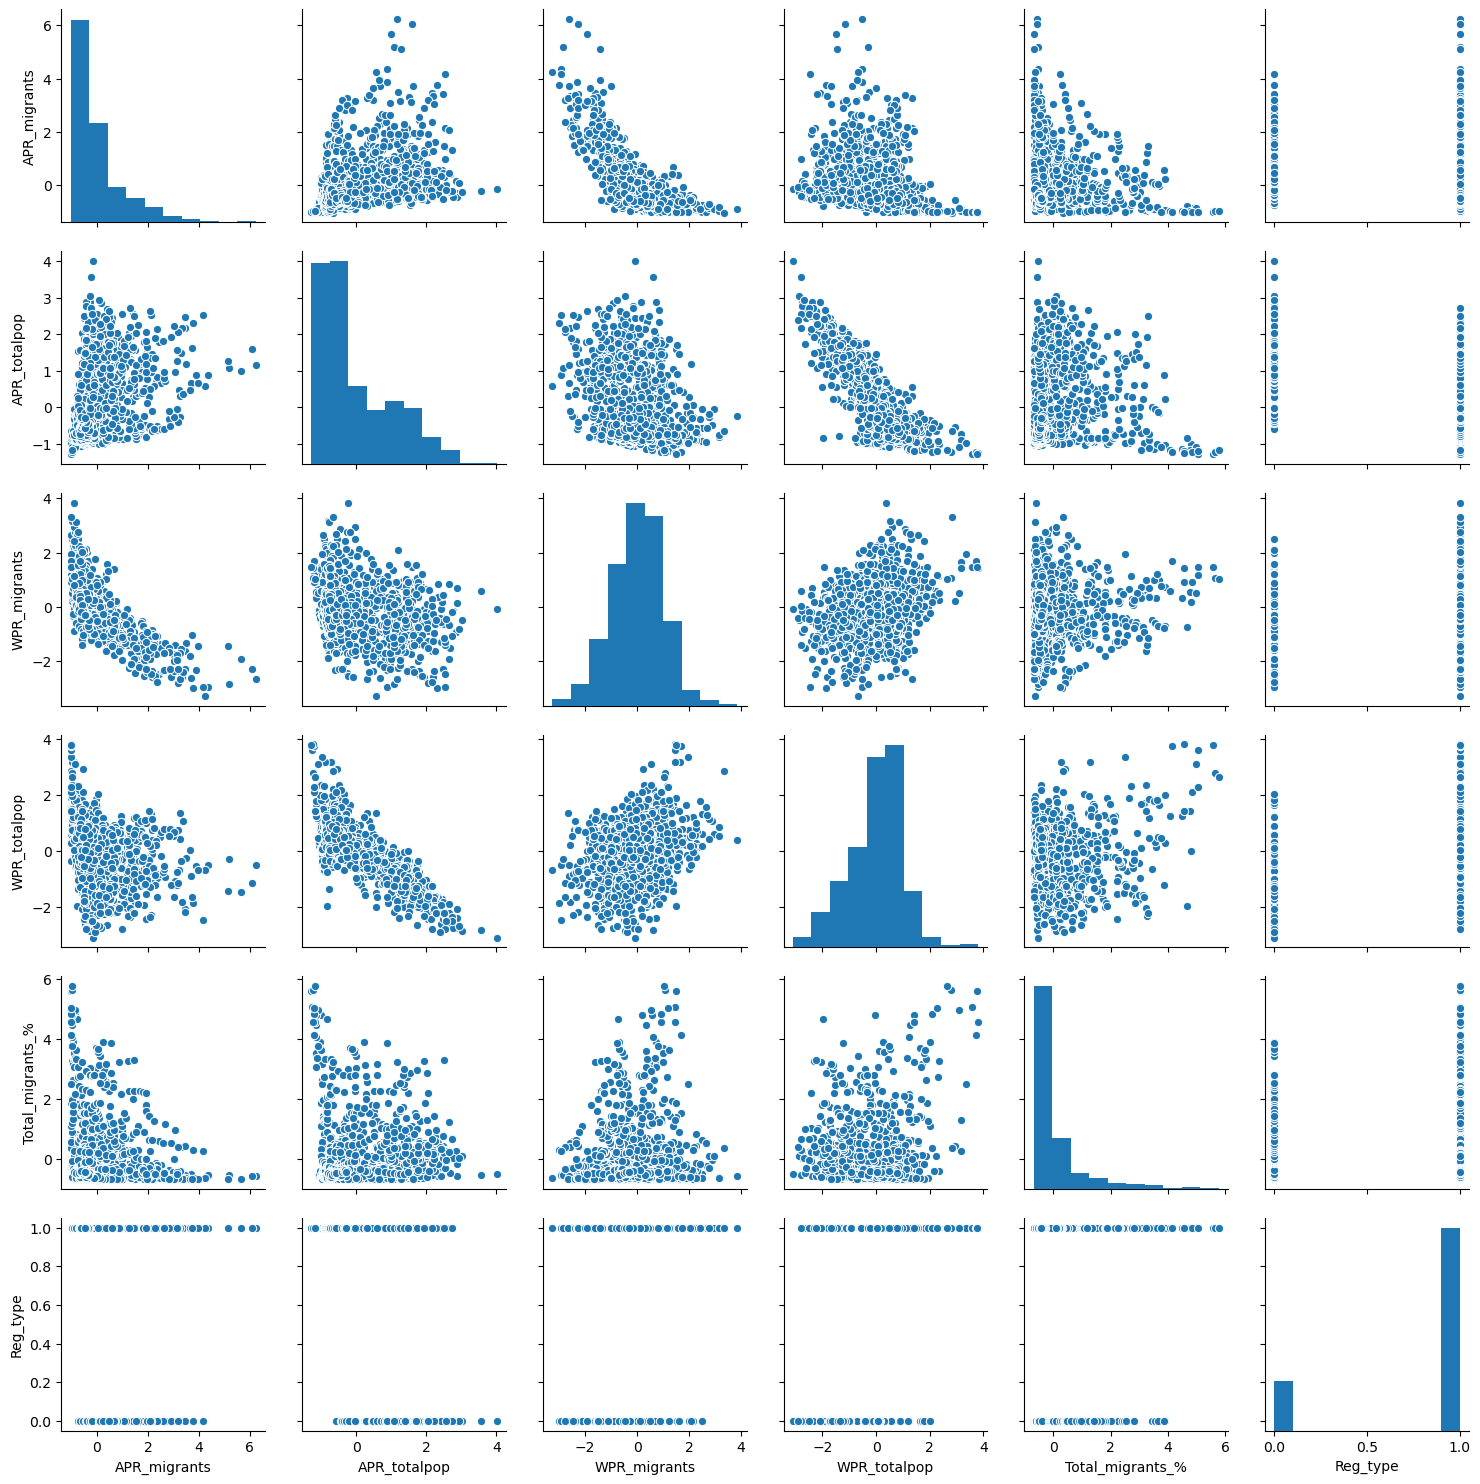

In [21]:
sns.pairplot(data_CRS_)

It's time to apply PCA, let's apply PCA on **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop** and **Total_migrants_%**, keeping the dimension of the original data. Then, find the projection of the dataset onto the principal components and call it Xhat, which will be our 'new' dataset. We concatenate these new datasets on principal component with our original datasets to form a table.

In [22]:
k = len(cols4X)
pca = PCA(n_components=k)
pca.fit(data_CRS_[cols4X])
#Xhat = pca.transform(data_CRS_)
#data_CRS_PCA = pd.DataFrame(columns=[f'Projection on Component {i+1}' for i in range(len(data_CRS_.columns))], data=Xhat)
Xhat = pd.DataFrame(pca.transform(data_CRS_[cols4X]), columns=['PC{}'.format(i+1) for i in range(k)])
data_CRS_PCA = pd.concat([data_CRS_, Xhat], axis=1)
data_CRS_PCA.head()

,APR_migrants,APR_totalpop,WPR_migrants,WPR_totalpop,Total_migrants_%,Reg_type,PC1,PC2,PC3,PC4,PC5
0,-0.552733,-0.890167,0.414815,-0.132302,-0.240217,1,-0.891171,0.026244,-0.307682,-0.426687,0.523054
1,-0.552782,-0.931170,0.414810,-0.643365,-0.377105,1,-0.669778,-0.072450,-0.608662,-0.627832,0.826042
2,-0.485489,-0.939331,0.550346,-0.450312,-0.544740,1,-0.806200,0.079364,-0.688768,-0.433586,0.775752
3,-0.579014,-0.981760,-0.103447,0.384184,-0.497245,1,-0.962906,0.621709,-0.117880,-0.606504,0.095955
4,-0.524693,-1.003780,-0.107635,0.924402,-0.480148,1,-1.206995,0.852257,0.130861,-0.386268,-0.173253


Here is our Principal Component Loading Matrix. We can see that for **PC1**, **APR_totalpop** counts most, then **APR_migrants**, then **WPR_totalpop** and **WPR_migrants**, so on and so forth.

In [23]:
components = pd.DataFrame(pca.components_, columns=cols4X)
components = pd.concat([pd.DataFrame({'PC':['PC1','PC2','PC3','PC4', 'PC5']}), components], axis=1)
components.set_index('PC', inplace=True)
components

,APR_migrants,APR_totalpop,WPR_migrants,WPR_totalpop,Total_migrants_%
PC,,,,,
PC1,0.502294,0.525499,-0.483633,-0.485913,0.039231
PC2,0.407932,-0.367947,-0.414681,0.386956,-0.613606
PC3,0.253389,-0.235627,-0.329220,0.398021,0.783241
PC4,0.590948,0.351845,0.625834,0.367742,-0.009151
PC5,0.409716,-0.639649,0.306732,-0.566126,0.091640


Let's check the relationships between these variables using seaborn's <code>pairplot()</code> function. We can see the points with **PCi** (i=1,2,3,4,5) appear more decorrelated. We now can obtained features that are more linearly independent of each other if focusing on these derived variables.

Our focus is now attached onto the **PC1**, **PC2**, **PC3**, **PC4** and **PC5** to carry out the attention to the variables of **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop** and **Total_migrants_%**.

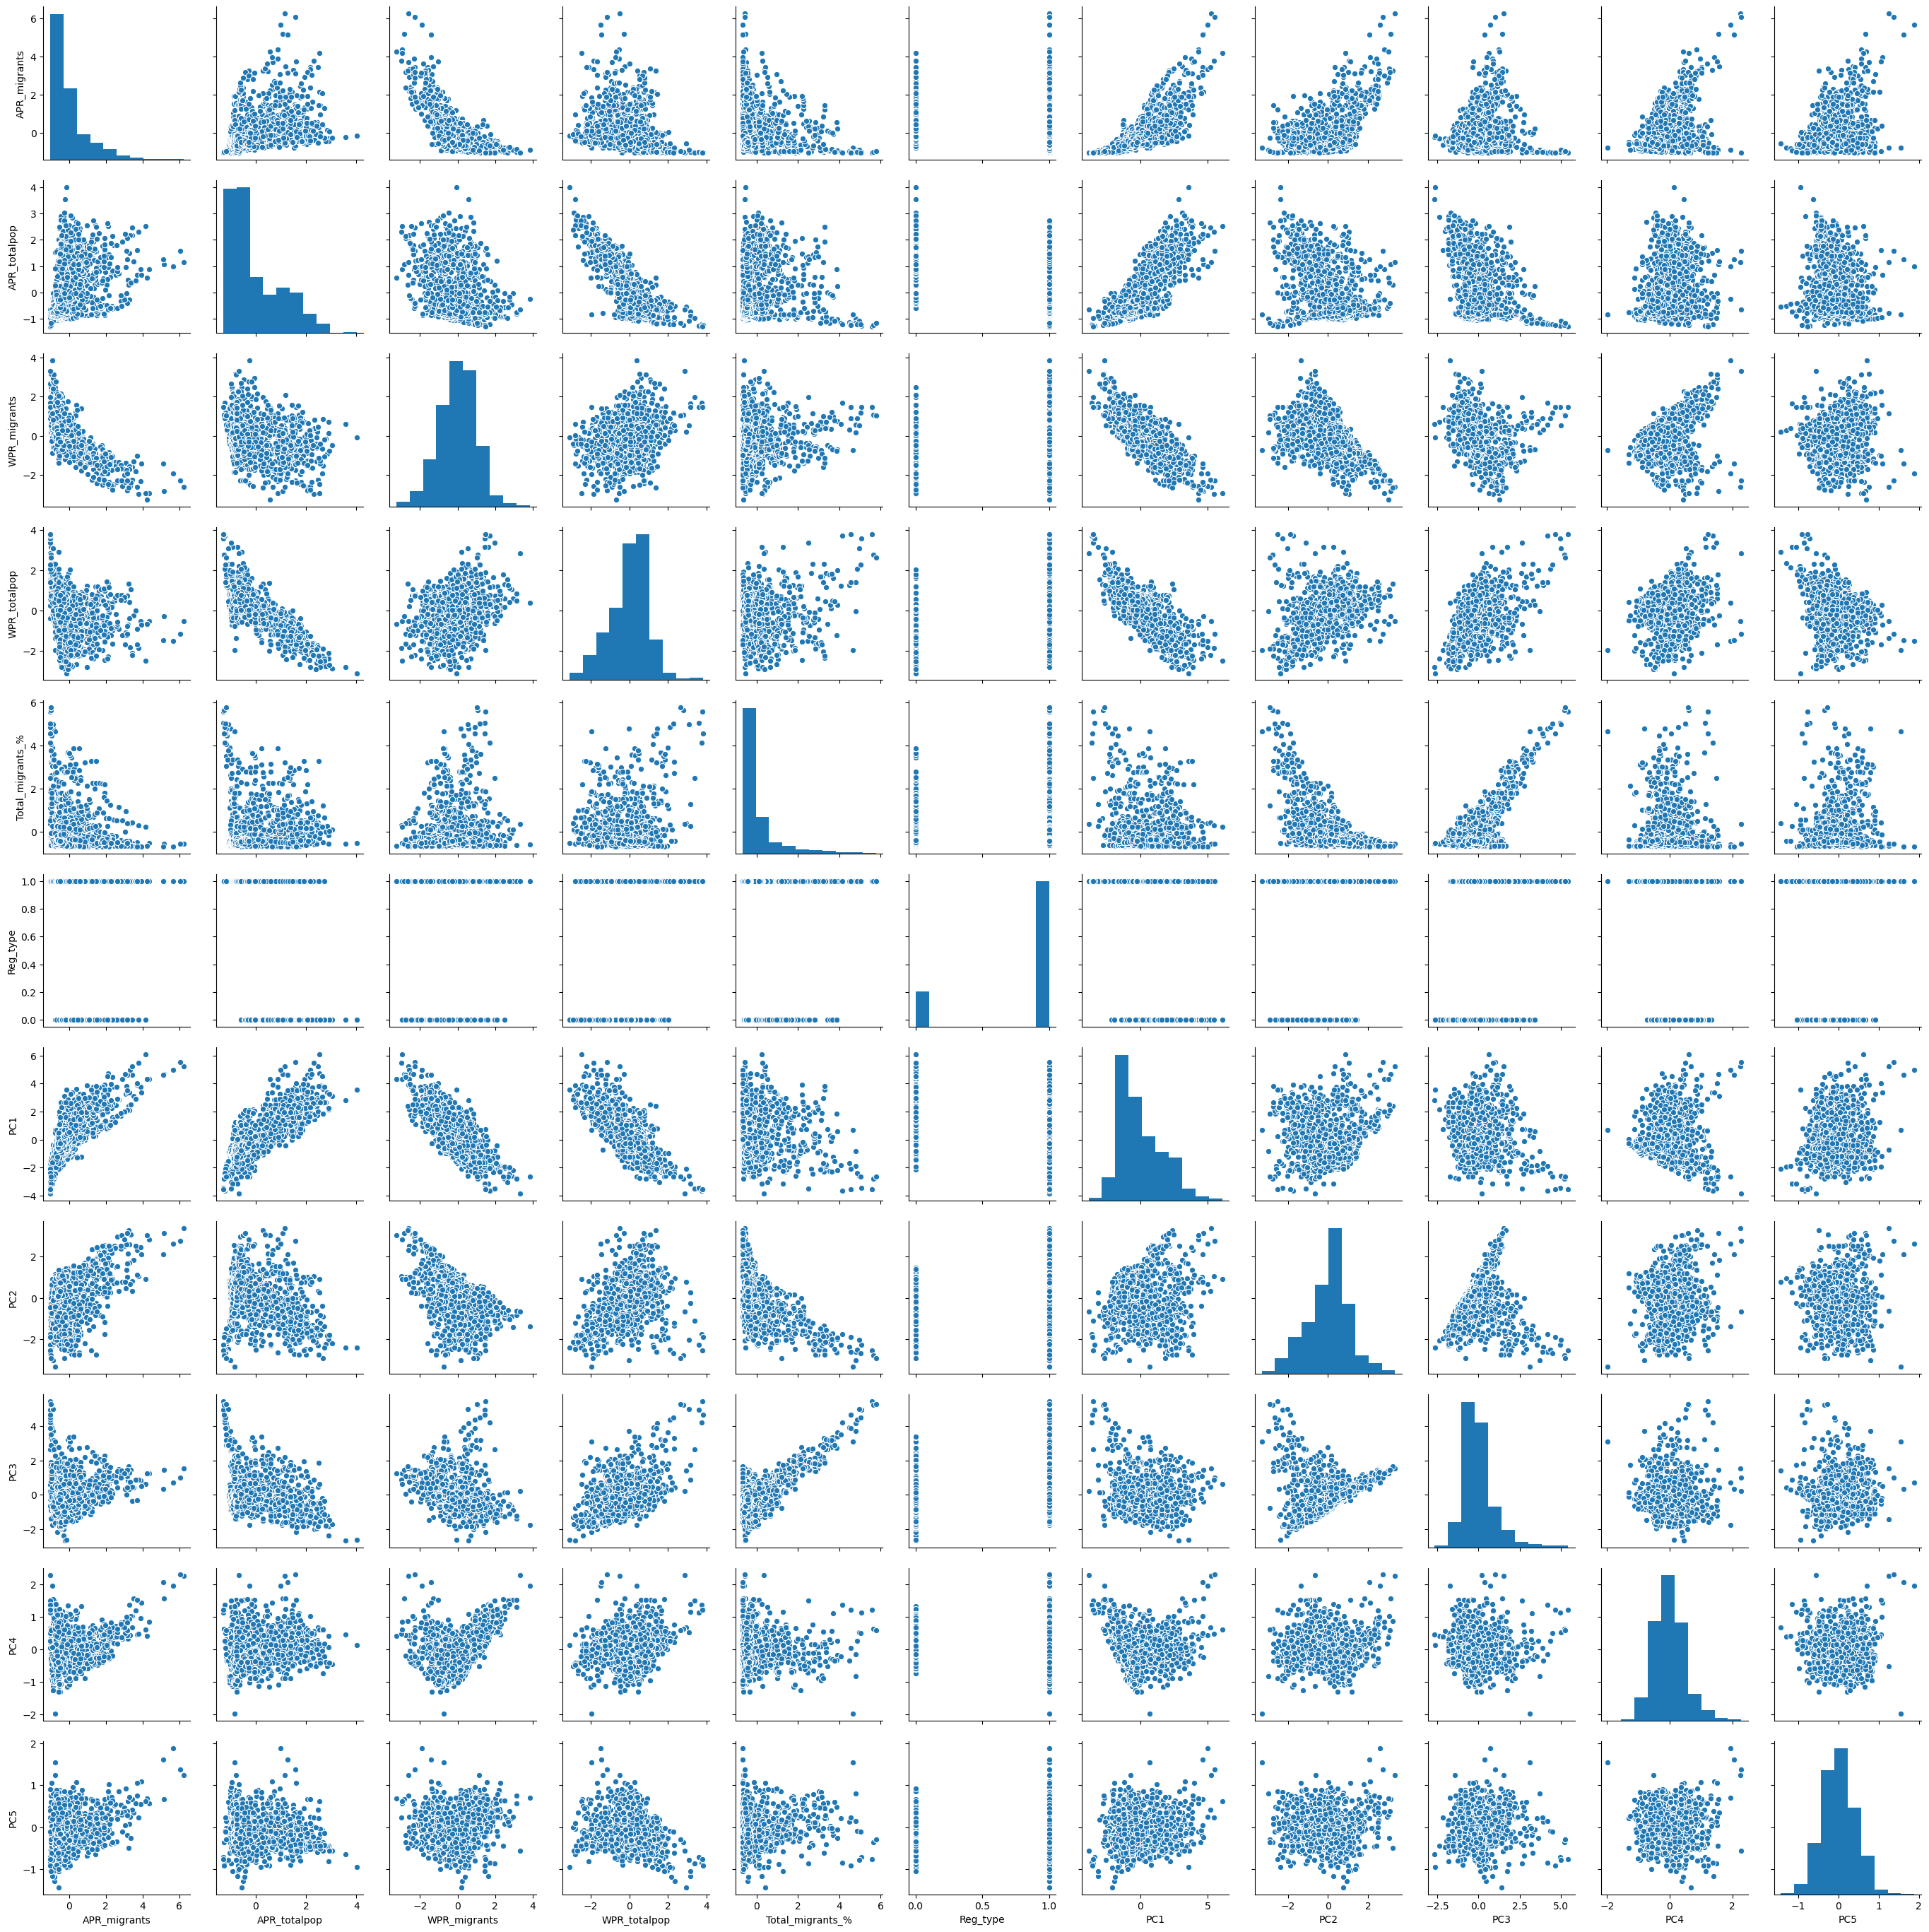

In [24]:
sns.pairplot(data_CRS_PCA)

The distribution of values of the **PCi** does not look very skewed. And to preventing any further variance among the feature value, we currently skip the normalization such as box cox transformation. Such dataset is ready for clustering. We select the column of **PC1**, **PC2**, **PC3**, **PC4** and **PC5** out into X.

There is imbalance distribution of our target variables, for developing regions outnumber the developed ones so much. This can be done using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes. So we first split the data into train and test data sets by row, then select the target variable **y** and the independent variables **X** by column. **To fit a neural network, the input of X and y should be converted to arrays first and make sure y with 2 columns.**

In [35]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data_CRS_PCA[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], data_CRS_PCA.Reg_type))

X_train = data_CRS_PCA.loc[train_idx, ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values
y_train = data_CRS_PCA.loc[train_idx, 'Reg_type'].values.reshape(-1, 1)
X_test = data_CRS_PCA.loc[test_idx, ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values
y_test = data_CRS_PCA.loc[test_idx, 'Reg_type'].values.reshape(-1, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

We set an explicit function to measure the error and accuracy. And based on that, we set dict variables to record outputs during the modeling training. **Note that we must first get the predicted 'code' of y, then search the information at one column to make comparisions**.

In [26]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    pred4test = np.round(model.predict(X_test))
    pred4train = np.round(model.predict(X_train))
    return  {"test Accuracy": metrics.accuracy_score(y_test[:, 0], pred4test[:, 0]),
             "train Accuracy": metrics.accuracy_score(y_train[:, 0], pred4train[:, 0])}

REC = {}

We also set the function below to plot the confusion matrix of the predicted inputs.

In [27]:
def plot_cm(y, yhat):
    cm = confusion_matrix(y, yhat)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    plt.close()

If we want to see how different variables of X affect our prediction. So we set another function to plot their coefficients. Based on the codes below, **use the** <code>model.add(ExplainedVariance())</code> **to add on an explain layer, then run** <code>model.layers[-1].get_output()</code>". Here, we skip such sector for interpretation.

In [28]:
def get_feature_coefs(model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

Let's create the first deep neural network expected to just have 2 hidden layers, called dnn2. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. **Don't forget to add on a sigmoid function on the last layer because the output is catagorial**.

In [44]:
dnn2 = Sequential([
    Dense(10, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(5, activation='relu', name='dense_2'),
    Dense(y_train.shape[1], activation='softmax', name='dense_3')
], name='dnn2')
dnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn2.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn2.predict(X_test))
REC['dnn2'] = get_accuracy(X_train, X_test, y_train, y_test, dnn2)
print(REC['dnn2'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 1s - loss: 0.4916 - acc: 0.7968 - val_loss: 0.4443 - val_acc: 0.8151
Epoch 2/50
 - 0s - loss: 0.4482 - acc: 0.7982 - val_loss: 0.4044 - val_acc: 0.8151
Epoch 3/50
 - 0s - loss: 0.4121 - acc: 0.8144 - val_loss: 0.3712 - val_acc: 0.8185
Epoch 4/50
 - 0s - loss: 0.3828 - acc: 0.8365 - val_loss: 0.3446 - val_acc: 0.8459
Epoch 5/50
 - 0s - loss: 0.3591 - acc: 0.8616 - val_loss: 0.3234 - val_acc: 0.8870
Epoch 6/50
 - 0s - loss: 0.3390 - acc: 0.8719 - val_loss: 0.3044 - val_acc: 0.9075
Epoch 7/50
 - 0s - loss: 0.3210 - acc: 0.8719 - val_loss: 0.2888 - val_acc: 0.9110
Epoch 8/50
 - 0s - loss: 0.3063 - acc: 0.8792 - val_loss: 0.2767 - val_acc: 0.9041
Epoch 9/50
 - 0s - loss: 0.2937 - acc: 0.8778 - val_loss: 0.2662 - val_acc: 0.9075
Epoch 10/50
 - 0s - loss: 0.2831 - acc: 0.8822 - val_loss: 0.2582 - val_acc: 0.9041
Epoch 11/50
 - 0s - loss: 0.2741 - acc: 0.8822 - val_loss: 0.2509 - val_acc: 0.9075
Epoch 12/50
 - 0s - loss: 0.2664 - acc:

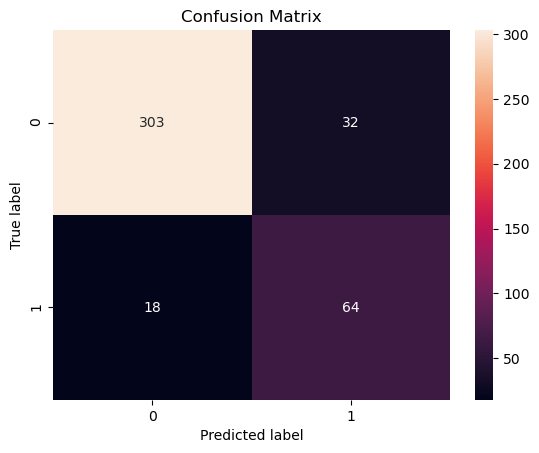

In [42]:
plot_cm(y_test[:, 0], predicted[:, 0])

Let's create the second deep neural network expected to have 2 hidden layers and 1 dropout layer, called dnn2_dp1. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, it does slightly worse than dnn2.

In [45]:
dnn2_dp1 = Sequential([
    Dense(10, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(5, activation='relu', name='dense_2'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax', name='dense_3')
], name='dnn2_dp1')
dnn2_dp1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn2_dp1.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn2_dp1.predict(X_test))
REC['dnn2_dp1'] = get_accuracy(X_train, X_test, y_train, y_test, dnn2_dp1)
print(REC['dnn2_dp1'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 1s - loss: 0.6689 - acc: 0.6863 - val_loss: 0.6122 - val_acc: 0.7500
Epoch 2/50
 - 0s - loss: 0.5865 - acc: 0.7010 - val_loss: 0.5241 - val_acc: 0.7911
Epoch 3/50
 - 0s - loss: 0.5303 - acc: 0.7482 - val_loss: 0.4607 - val_acc: 0.8253
Epoch 4/50
 - 0s - loss: 0.4783 - acc: 0.8100 - val_loss: 0.4116 - val_acc: 0.8527
Epoch 5/50
 - 0s - loss: 0.4460 - acc: 0.8144 - val_loss: 0.3738 - val_acc: 0.8596
Epoch 6/50
 - 0s - loss: 0.4184 - acc: 0.8365 - val_loss: 0.3446 - val_acc: 0.9041
Epoch 7/50
 - 0s - loss: 0.3978 - acc: 0.8424 - val_loss: 0.3204 - val_acc: 0.9075
Epoch 8/50
 - 0s - loss: 0.3583 - acc: 0.8468 - val_loss: 0.3008 - val_acc: 0.9144
Epoch 9/50
 - 0s - loss: 0.3556 - acc: 0.8630 - val_loss: 0.2859 - val_acc: 0.9178
Epoch 10/50
 - 0s - loss: 0.3458 - acc: 0.8557 - val_loss: 0.2726 - val_acc: 0.9247
Epoch 11/50
 - 0s - loss: 0.3217 - acc: 0.8689 - val_loss: 0.2623 - val_acc: 0.9212
Epoch 12/50
 - 0s - loss: 0.3205 - acc:

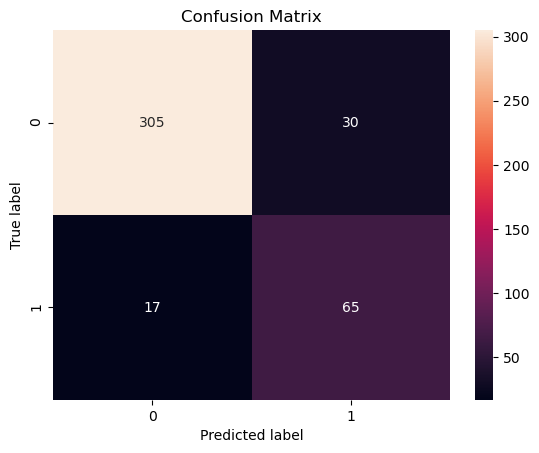

In [46]:
plot_cm(y_test[:, 0], predicted[:, 0])

What about add more hidden layers? Let's create the first deep neural network expected to just have 5 hidden layers, called dnn5. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, it does similar jobs to dnn2 on test dataset. **Till now, there may be risks of overfitting by increasing more hidden layers**. 

In [47]:
dnn5 = Sequential([
    Dense(10, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(8, activation='relu', name='dense_2'),
    Dense(6, activation='relu', name='dense_3'),
    Dense(4, activation='relu', name='dense_4'),
    Dense(y_train.shape[1], activation='softmax', name='dense_5')
], name='dnn5')
dnn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn5.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn5.predict(X_test))
REC['dnn5'] = get_accuracy(X_train, X_test, y_train, y_test, dnn5)
print(REC['dnn5'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 1s - loss: 0.8134 - acc: 0.1900 - val_loss: 0.7693 - val_acc: 0.2363
Epoch 2/50
 - 0s - loss: 0.7234 - acc: 0.4300 - val_loss: 0.6932 - val_acc: 0.5685
Epoch 3/50
 - 0s - loss: 0.6688 - acc: 0.7113 - val_loss: 0.6507 - val_acc: 0.7603
Epoch 4/50
 - 0s - loss: 0.6364 - acc: 0.7968 - val_loss: 0.6181 - val_acc: 0.8322
Epoch 5/50
 - 0s - loss: 0.6076 - acc: 0.8454 - val_loss: 0.5870 - val_acc: 0.8767
Epoch 6/50
 - 0s - loss: 0.5806 - acc: 0.8557 - val_loss: 0.5550 - val_acc: 0.8870
Epoch 7/50
 - 0s - loss: 0.5512 - acc: 0.8601 - val_loss: 0.5199 - val_acc: 0.9007
Epoch 8/50
 - 0s - loss: 0.5196 - acc: 0.8675 - val_loss: 0.4853 - val_acc: 0.9178
Epoch 9/50
 - 0s - loss: 0.4870 - acc: 0.8719 - val_loss: 0.4499 - val_acc: 0.9212
Epoch 10/50
 - 0s - loss: 0.4509 - acc: 0.8763 - val_loss: 0.4071 - val_acc: 0.9212
Epoch 11/50
 - 0s - loss: 0.4035 - acc: 0.8807 - val_loss: 0.3508 - val_acc: 0.9247
Epoch 12/50
 - 0s - loss: 0.3568 - acc:

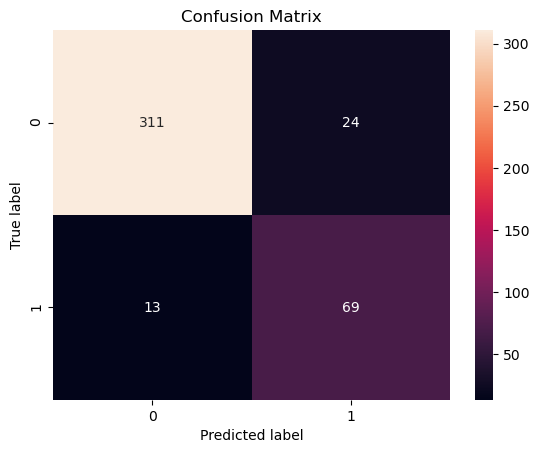

In [48]:
plot_cm(y_test[:, 0], predicted[:, 0])

Let's create the fourth deep neural network expected to have 5 hidden layers and 3 dropout layer, called dnn5_dp3. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, despite its good job on training dataset, it does slightly worse on test dataset, compared with dnn5. **It is disclosed that too many dropout layers increase the model complexity, thus inviting more risks of overfitting**.

In [49]:
dnn5_dp3 = Sequential([
    Dense(10, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(8, activation='relu', name='dense_2'),
    Dropout(0.2),
    Dense(6, activation='relu', name='dense_3'),
    Dropout(0.2),
    Dense(4, activation='relu', name='dense_4'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax', name='dense_5')
], name='dnn5_dp3')
dnn5_dp3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn5_dp3.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn5_dp3.predict(X_test))
REC['dnn5_dp3'] = get_accuracy(X_train, X_test, y_train, y_test, dnn5_dp3)
print(REC['dnn5_dp3'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 1s - loss: 0.6259 - acc: 0.6730 - val_loss: 0.5679 - val_acc: 0.8048
Epoch 2/50
 - 0s - loss: 0.5558 - acc: 0.7305 - val_loss: 0.5057 - val_acc: 0.8151
Epoch 3/50
 - 0s - loss: 0.5248 - acc: 0.7408 - val_loss: 0.4539 - val_acc: 0.8151
Epoch 4/50
 - 0s - loss: 0.4967 - acc: 0.7541 - val_loss: 0.4137 - val_acc: 0.8151
Epoch 5/50
 - 0s - loss: 0.4779 - acc: 0.7423 - val_loss: 0.3832 - val_acc: 0.8151
Epoch 6/50
 - 0s - loss: 0.4507 - acc: 0.7629 - val_loss: 0.3609 - val_acc: 0.8151
Epoch 7/50
 - 0s - loss: 0.4516 - acc: 0.7761 - val_loss: 0.3393 - val_acc: 0.8151
Epoch 8/50
 - 0s - loss: 0.4459 - acc: 0.7909 - val_loss: 0.3278 - val_acc: 0.8151
Epoch 9/50
 - 0s - loss: 0.4095 - acc: 0.7982 - val_loss: 0.3126 - val_acc: 0.8151
Epoch 10/50
 - 0s - loss: 0.3945 - acc: 0.7982 - val_loss: 0.2984 - val_acc: 0.8151
Epoch 11/50
 - 0s - loss: 0.3935 - acc: 0.7982 - val_loss: 0.2892 - val_acc: 0.8151
Epoch 12/50
 - 0s - loss: 0.3973 - acc:

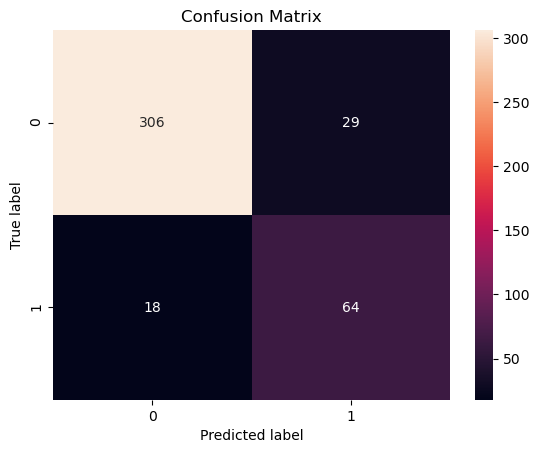

In [50]:
plot_cm(y_test[:, 0], predicted[:, 0])

Based on the above insights, let's create the fifth deep neural network expected to have 7 hidden layers and 1 dropout layer, called dnn7_dp1. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, it does slightly worse on test dataset, compared with dnn5.

In [65]:
dnn7_dp1 = Sequential([
    Dense(10, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(8, activation='relu', name='dense_2'),
    Dense(7, activation='relu', name='dense_3'),
    Dense(6, activation='relu', name='dense_4'),
    Dense(5, activation='relu', name='dense_5'),
    Dense(4, activation='relu', name='dense_6'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax', name='dense_7')
], name='dnn7_dp1')
dnn7_dp1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn7_dp1.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn7_dp1.predict(X_test))
REC['dnn7_dp1'] = get_accuracy(X_train, X_test, y_train, y_test, dnn7_dp1)
print(REC['dnn7_dp1'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 2s - loss: 0.6953 - acc: 0.6186 - val_loss: 0.6788 - val_acc: 0.8390
Epoch 2/50
 - 0s - loss: 0.6702 - acc: 0.8557 - val_loss: 0.6621 - val_acc: 0.8390
Epoch 3/50
 - 0s - loss: 0.6549 - acc: 0.8454 - val_loss: 0.6447 - val_acc: 0.8493
Epoch 4/50
 - 0s - loss: 0.6366 - acc: 0.8601 - val_loss: 0.6249 - val_acc: 0.8664
Epoch 5/50
 - 0s - loss: 0.6170 - acc: 0.8719 - val_loss: 0.6050 - val_acc: 0.8630
Epoch 6/50
 - 0s - loss: 0.5925 - acc: 0.8851 - val_loss: 0.5820 - val_acc: 0.8801
Epoch 7/50
 - 0s - loss: 0.5690 - acc: 0.8881 - val_loss: 0.5578 - val_acc: 0.8870
Epoch 8/50
 - 0s - loss: 0.5540 - acc: 0.8763 - val_loss: 0.5308 - val_acc: 0.8973
Epoch 9/50
 - 0s - loss: 0.5236 - acc: 0.8807 - val_loss: 0.5010 - val_acc: 0.9007
Epoch 10/50
 - 0s - loss: 0.4926 - acc: 0.8895 - val_loss: 0.4694 - val_acc: 0.9178
Epoch 11/50
 - 0s - loss: 0.4759 - acc: 0.8851 - val_loss: 0.4415 - val_acc: 0.9110
Epoch 12/50
 - 0s - loss: 0.4440 - acc:

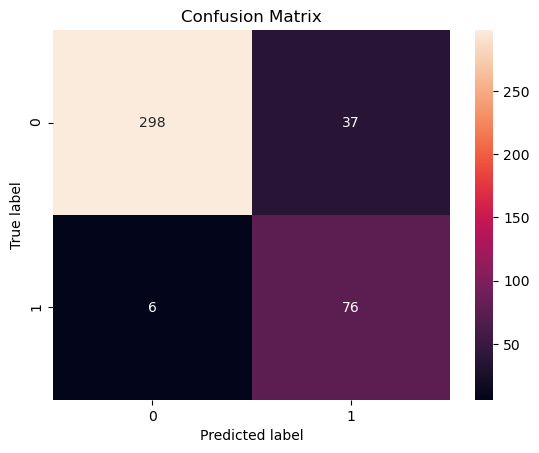

In [53]:
plot_cm(y_test[:, 0], predicted[:, 0])

Let's go on to create the sixth deep neural network expected to have 7 hidden layers, called dnn7. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, As we can see, it does worse than dnn5 both on training dataset and test dataset.

In [69]:
dnn7 = Sequential([
    Dense(10, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(8, activation='relu', name='dense_2'),
    Dense(7, activation='relu', name='dense_3'),
    Dense(6, activation='relu', name='dense_4'),
    Dense(5, activation='relu', name='dense_5'),
    Dense(4, activation='relu', name='dense_6'),
    Dense(y_train.shape[1], activation='softmax', name='dense_7')
], name='dnn7')
dnn7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn7.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn7.predict(X_test))
REC['dnn7'] = get_accuracy(X_train, X_test, y_train, y_test, dnn7)
print(REC['dnn7'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 2s - loss: 0.6756 - acc: 0.7997 - val_loss: 0.6535 - val_acc: 0.8151
Epoch 2/50
 - 0s - loss: 0.6338 - acc: 0.7982 - val_loss: 0.6019 - val_acc: 0.8151
Epoch 3/50
 - 0s - loss: 0.5729 - acc: 0.7982 - val_loss: 0.5169 - val_acc: 0.8151
Epoch 4/50
 - 0s - loss: 0.4812 - acc: 0.7982 - val_loss: 0.4128 - val_acc: 0.8151
Epoch 5/50
 - 0s - loss: 0.3931 - acc: 0.7982 - val_loss: 0.3379 - val_acc: 0.8151
Epoch 6/50
 - 0s - loss: 0.3352 - acc: 0.7982 - val_loss: 0.2975 - val_acc: 0.8151
Epoch 7/50
 - 0s - loss: 0.3020 - acc: 0.7982 - val_loss: 0.2847 - val_acc: 0.8151
Epoch 8/50
 - 0s - loss: 0.2855 - acc: 0.7982 - val_loss: 0.2787 - val_acc: 0.8151
Epoch 9/50
 - 0s - loss: 0.2758 - acc: 0.7982 - val_loss: 0.2762 - val_acc: 0.8151
Epoch 10/50
 - 0s - loss: 0.2706 - acc: 0.7982 - val_loss: 0.2744 - val_acc: 0.8151
Epoch 11/50
 - 0s - loss: 0.2667 - acc: 0.7982 - val_loss: 0.2725 - val_acc: 0.8151
Epoch 12/50
 - 0s - loss: 0.2629 - acc:

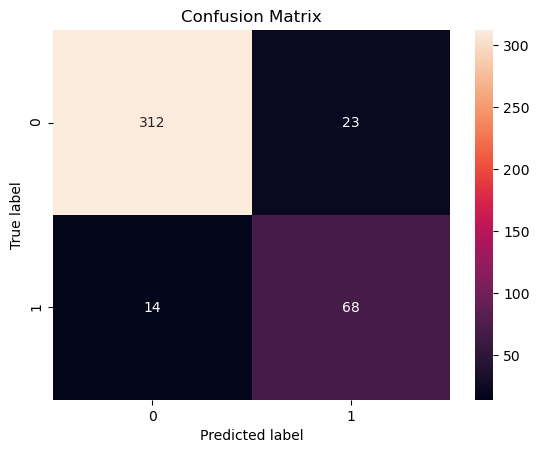

In [63]:
plot_cm(y_test[:, 0], predicted[:, 0])

Let's still based on the neural networks just with 2 hidden layers, but change the number of neurons in the layers. We then create the seventh deep neural network expected to have 15 neurons in first hidden layer, called dnn2w. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, despite its good job on training dataset, it does slightly worse on test dataset, compared with dnn2. **It is disclosed that too many neurons in one layer increase the model complexity, thus inviting more risks of overfitting**.

In [71]:
dnn2w = Sequential([
    Dense(15, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(5, activation='relu', name='dense_2'),
    Dense(y_train.shape[1], activation='softmax', name='dense_3')
], name='dnn2w')
dnn2w.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn2w.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn2w.predict(X_test))
REC['dnn2w'] = get_accuracy(X_train, X_test, y_train, y_test, dnn2w)
print(REC['dnn2w'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 2s - loss: 0.6335 - acc: 0.7909 - val_loss: 0.5978 - val_acc: 0.8116
Epoch 2/50
 - 0s - loss: 0.5823 - acc: 0.7982 - val_loss: 0.5429 - val_acc: 0.8151
Epoch 3/50
 - 0s - loss: 0.5292 - acc: 0.7982 - val_loss: 0.4891 - val_acc: 0.8151
Epoch 4/50
 - 0s - loss: 0.4770 - acc: 0.7982 - val_loss: 0.4348 - val_acc: 0.8151
Epoch 5/50
 - 0s - loss: 0.4254 - acc: 0.7968 - val_loss: 0.3839 - val_acc: 0.8288
Epoch 6/50
 - 0s - loss: 0.3776 - acc: 0.8174 - val_loss: 0.3387 - val_acc: 0.8733
Epoch 7/50
 - 0s - loss: 0.3370 - acc: 0.8557 - val_loss: 0.3025 - val_acc: 0.9075
Epoch 8/50
 - 0s - loss: 0.3036 - acc: 0.8704 - val_loss: 0.2751 - val_acc: 0.9178
Epoch 9/50
 - 0s - loss: 0.2797 - acc: 0.8792 - val_loss: 0.2544 - val_acc: 0.9144
Epoch 10/50
 - 0s - loss: 0.2623 - acc: 0.8881 - val_loss: 0.2409 - val_acc: 0.9178
Epoch 11/50
 - 0s - loss: 0.2502 - acc: 0.8925 - val_loss: 0.2309 - val_acc: 0.9178
Epoch 12/50
 - 0s - loss: 0.2414 - acc:

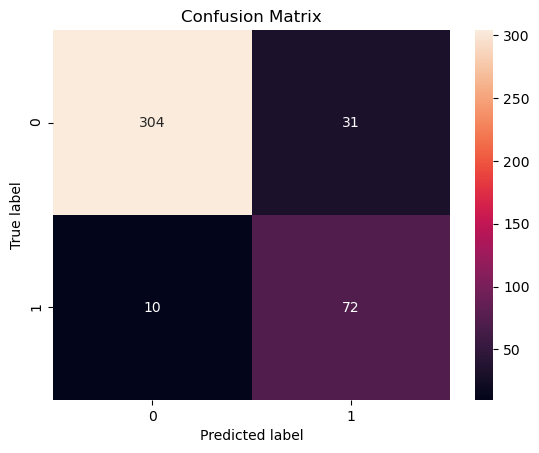

In [72]:
plot_cm(y_test[:, 0], predicted[:, 0])

Let's create the eighth deep neural network expected to have 2 hidden layers with 5 neurons in first hidden layer, called dnn2n. Then, train the model on the training data using 50 epochs and evaluate it on the test data with the predefined functions. As we can see, it does slightly worse both on training dataset and test dataset, compared with dnn2. **It is disclosed that too less neurons in one layer decrease the model complexity, thus inviting more risks of underfitting**.

In [73]:
dnn2n = Sequential([
    Dense(5, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
    Dense(5, activation='relu', name='dense_2'),
    Dense(y_train.shape[1], activation='softmax', name='dense_3')
], name='dnn2n')
dnn2n.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = dnn2n.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
predicted = np.round(dnn2n.predict(X_test))
REC['dnn2n'] = get_accuracy(X_train, X_test, y_train, y_test, dnn2n)
print(REC['dnn2n'])

Train on 679 samples, validate on 292 samples
Epoch 1/50
 - 2s - loss: 0.6573 - acc: 0.6848 - val_loss: 0.6141 - val_acc: 0.8048
Epoch 2/50
 - 0s - loss: 0.6044 - acc: 0.8336 - val_loss: 0.5663 - val_acc: 0.8767
Epoch 3/50
 - 0s - loss: 0.5617 - acc: 0.8675 - val_loss: 0.5236 - val_acc: 0.9075
Epoch 4/50
 - 0s - loss: 0.5240 - acc: 0.8719 - val_loss: 0.4858 - val_acc: 0.9178
Epoch 5/50
 - 0s - loss: 0.4881 - acc: 0.8719 - val_loss: 0.4500 - val_acc: 0.9178
Epoch 6/50
 - 0s - loss: 0.4540 - acc: 0.8704 - val_loss: 0.4163 - val_acc: 0.9247
Epoch 7/50
 - 0s - loss: 0.4221 - acc: 0.8719 - val_loss: 0.3849 - val_acc: 0.9075
Epoch 8/50
 - 0s - loss: 0.3918 - acc: 0.8748 - val_loss: 0.3567 - val_acc: 0.9110
Epoch 9/50
 - 0s - loss: 0.3653 - acc: 0.8792 - val_loss: 0.3319 - val_acc: 0.9041
Epoch 10/50
 - 0s - loss: 0.3426 - acc: 0.8792 - val_loss: 0.3114 - val_acc: 0.9041
Epoch 11/50
 - 0s - loss: 0.3234 - acc: 0.8792 - val_loss: 0.2940 - val_acc: 0.9041
Epoch 12/50
 - 0s - loss: 0.3075 - acc:

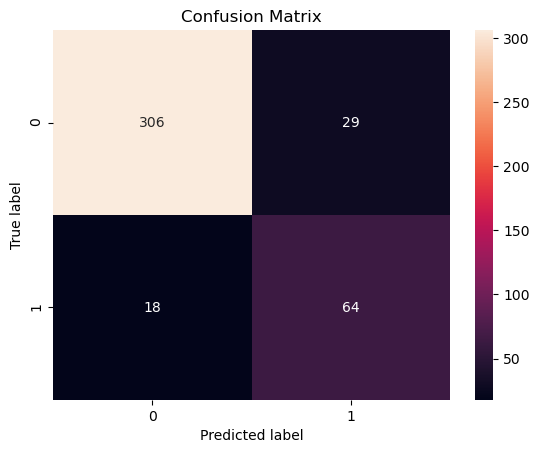

In [74]:
plot_cm(y_test[:, 0], predicted[:, 0])

The summary of prediction can be printed as:

In [75]:
REC_ = pd.DataFrame.from_dict(REC, orient='index')
REC_.rename(columns={0: 'test Accuracy', 1: 'train Accuracy'}, inplace=True)
REC_

,test Accuracy,train Accuracy
dnn2,0.911271,0.924820
dnn2_dp1,0.887290,0.906282
dnn5,0.911271,0.935118
dnn5_dp3,0.887290,0.920700
dnn7_dp1,0.899281,0.932029
dnn7,0.896882,0.918641
dnn2w,0.901679,0.922760
dnn2n,0.887290,0.906282


So far, we can conclude that the projected variables on **PCi** from **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop**, **Total_migrants_%** can effectively predict the variable of **Reg_type**, for the accuracy based on them is well over 0.90. The age patterns of total population and migrant stocks contribute to indicate whether their place is developed regions or not.

# 4. Insights and key findings


In our superficially constructed deep neural network, the output is already good enough because the test Accuracy	and train Accuracy are both over 0.90. 

It turns out that more dropout layers is not bound to predict better because of the problem of overfitting, especially when the neural networks is not deep. In our case, dnn2_dp1 and dnn5_dp3 underperform on both train datasets and test datasets compared with their precursors evidently. More dropouts of neural networks is not always helpful to raise its accuracy.

It turns out that more hidden layers does no better jobs on test datasets despite their better outputs on train datasets because of the problem of overfitting. In our case study, dnn5 and dnn7 do not perform better than dnn2 due to their too complex structures. More depth of neural networks is not always helpful to raise its accuracy. 

It turns out that too many neurons does worse jobs on test datasets despite their better outputs on train datasets because of the problem of overfitting. And too few neurons does worse jobs on both training datasets and test datasets. In our case study, dnn2 with 10 neurons in the first hidden layers does the best job on both train datasets and test datasets. There is a best-fitting point in the width of neural networks to maximize its accuracy.

During our exploration using different structures of deep neural networks, the test Accuracy is always relative high. All of eight models can output a relative precise results to predict the development whether a region is developed or developing based on projected variables on **PCi** from **APR_migrants**, **APR_totalpop**, **WPR_migrants**, **WPR_totalpop**, **Total_migrants_%**. There may be a corelationship between the age patterns of population and the development status of their place.

Key findings: to solve the question of classification based on numerical variables, a rather simple deep neural network can perform well. Too many dropouts and hidden layers may increase the risk of overfitting. There is a certain number of neurons in each layer that can help to reach the highest prediction accuracy.

As to our dataset for the study case, the PCR based on age pattern of total population and migrant stocks contributes to predict whether a region is developed or developing. The influence produced by their projection on principle components is phenomenal for the classification modeling.

# 5. Next Steps


From the conclusions above, **there is phenomenal correlations between the region type and age pattern of population**.

There are some other fields and rows in this data which we has dropped. For example, the rows representing the where the country/area type such as 'Developed regions', 'Less developed regions', 'Less developed regions, excluding least developed countries', 'Less developed regions, excluding China', 'Least developed countries', 'Land-locked Developing Countries (LLDC)', 'Small island developing States (SIDS)', 'High-income countries', 'Middle-income countries', 'Upper-middle-income countries', 'Lower-middle-income countries', 'Low-income countries', where 'Type of data' is not non-null. These classifications may provide additional views for training the model.

The quality of the data of <code>undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx</code> still need refinement, due to its relative large time grains of five years. Such container of sliced data is not continous enough to avoid outliers.

For next steps, **it may be helpful to draw precise conclusions if every-year data of total population and migrant stock between 1990 and 2020 can be provided**. And it will provoke more thinkings on mechanisms with such additional data as the **growth rate of each proportion by age group derived**. Insights from these further analysis can help us in decision making when it comes to comprehending population aging and the development status of a region.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
